In [1]:
import pandas as pd
import numpy as np
from matplotlib import rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape
train.head()

,datetime,계절,년,월,주차,요일,holiday,영업일수,고객수,고객단가,매출금액,폐기금액,센터재고금액,폐점,출점,평균기온,최저기온,최고기온,강수량,center
0,2021-01-01,4,2021,1,1,6,1,4731,703671,7577.0,5331388592,110219305,43634221539,3,1,-3.0,-9.0,2.0,0.0,4588701172
1,2021-01-02,4,2021,1,1,7,0,4833,749031,7317.0,5480571668,103816736,41089271014,0,1,-3.0,-7.0,1.0,0.0,5398675582
2,2021-01-03,4,2021,1,2,1,0,4781,660789,6979.0,4611876399,97123097,40990482121,0,0,-3.0,-8.0,1.0,0.0,646981558
3,2021-01-04,4,2021,1,2,2,0,4908,813596,6738.0,5482068572,100238682,38111306642,3,2,-2.0,-8.0,4.0,0.0,4378560891
4,2021-01-05,4,2021,1,2,3,0,4904,798984,6764.0,5404038379,101669633,40143317541,2,1,-2.0,-7.0,2.0,0.0,5836305593


In [3]:
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.shape
test.head()

,datetime,계절,년,월,주차,요일,holiday,영업일수,고객수,고객단가,매출금액,폐기금액,센터재고금액,폐점,출점,평균기온,최저기온,최고기온,강수량
0,2023-10-01,3,2023,10,40,1,0,6273.111685,1116908.000,6987.023560,8.210356e+09,114908243.2,68724403983,12.666667,1.721739,17.7,12.7,23.6,0.0
1,2023-10-02,3,2023,10,40,2,1,6406.721483,1301619.692,6677.742681,8.745326e+09,129536199.5,63941300008,0.550725,0.000000,16.4,10.7,23.8,0.0
2,2023-10-03,3,2023,10,40,3,1,6239.306991,1262276.769,6726.807590,8.407867e+09,123166186.4,67112885961,0.000000,0.000000,15.6,11.7,20.6,0.3
3,2023-10-04,3,2023,10,40,4,0,6423.266960,1275557.692,6774.801356,8.776148e+09,119640740.5,69006310777,0.000000,3.443478,18.5,11.0,26.0,3.4
4,2023-10-05,3,2023,10,40,5,0,6428.260146,1265715.000,6838.127543,8.797933e+09,118575970.9,66274293813,0.000000,2.582609,13.5,7.0,20.0,0.0


In [4]:
feature_names = ['센터재고금액' , '폐점', '출점','월','주차','요일','영업일수','고객수','매출금액','폐기금액','고객단가','강수량','평균기온','최고기온','최저기온','년','계절','holiday'  ]

feature_names  #전사를 할땐 '센터재고금액' , '폐점', '출점', 넣어주기

['센터재고금액',
 '폐점',
 '출점',
 '월',
 '주차',
 '요일',
 '영업일수',
 '고객수',
 '매출금액',
 '폐기금액',
 '고객단가',
 '강수량',
 '평균기온',
 '최고기온',
 '최저기온',
 '년',
 '계절',
 'holiday']

In [5]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(1003, 18)


,센터재고금액,폐점,출점,월,주차,요일,영업일수,고객수,매출금액,폐기금액,고객단가,강수량,평균기온,최고기온,최저기온,년,계절,holiday
0,43634221539,3,1,1,1,6,4731,703671,5331388592,110219305,7577.0,0.0,-3.0,2.0,-9.0,2021,4,1
1,41089271014,0,1,1,1,7,4833,749031,5480571668,103816736,7317.0,0.0,-3.0,1.0,-7.0,2021,4,0
2,40990482121,0,0,1,2,1,4781,660789,4611876399,97123097,6979.0,0.0,-3.0,1.0,-8.0,2021,4,0
3,38111306642,3,2,1,2,2,4908,813596,5482068572,100238682,6738.0,0.0,-2.0,4.0,-8.0,2021,4,0
4,40143317541,2,1,1,2,3,4904,798984,5404038379,101669633,6764.0,0.0,-2.0,2.0,-7.0,2021,4,0


In [6]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(31, 18)


,센터재고금액,폐점,출점,월,주차,요일,영업일수,고객수,매출금액,폐기금액,고객단가,강수량,평균기온,최고기온,최저기온,년,계절,holiday
0,68724403983,12.666667,1.721739,10,40,1,6273.111685,1116908.000,8.210356e+09,114908243.2,6987.023560,0.0,17.7,23.6,12.7,2023,3,0
1,63941300008,0.550725,0.000000,10,40,2,6406.721483,1301619.692,8.745326e+09,129536199.5,6677.742681,0.0,16.4,23.8,10.7,2023,3,1
2,67112885961,0.000000,0.000000,10,40,3,6239.306991,1262276.769,8.407867e+09,123166186.4,6726.807590,0.3,15.6,20.6,11.7,2023,3,1
3,69006310777,0.000000,3.443478,10,40,4,6423.266960,1275557.692,8.776148e+09,119640740.5,6774.801356,3.4,18.5,26.0,11.0,2023,3,0
4,66274293813,0.000000,2.582609,10,40,5,6428.260146,1265715.000,8.797933e+09,118575970.9,6838.127543,0.0,13.5,20.0,7.0,2023,3,0


In [7]:
label_name = 'center'

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(1003,)


0    4588701172
1    5398675582
2     646981558
3    4378560891
4    5836305593
Name: center, dtype: int64

In [8]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 값이 0일 수도 있어서 로그를 취했을 때 마이너스 무한대가 될 수도 있기 때문에 1을 더해 줌
    # 로그를 씌워주는 것은 정규분포로 만들어주기 위해
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

선형회귀 모델 Linear Regression Model

선형회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘
선형회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(MSE)를 최소화하는 파라미터 w와 b를 찾는다.
매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 수 없다는 단점이 있다.
아래 위키피디아에서 가져 온 그래프에서 파란선이 선형회귀 모델을 나타내고 빨간점들이 훈련데이터를 나타낸다.

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train_log = np.log1p(y_train)
lModel.fit(X_train, y_train_log)

# 예측하고 정확도를 평가한다.
preds = lModel.predict(X_train)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train_log),np.exp(preds), False))

RMSLE Value For Linear Regression:  0.3896999032116378


릿지 Regularization Model - Ridge

회귀를 위한 선형모델
가중치(w)의 모든 원소가 0에 가깝게 만들어 모든 피처가 주는 영향을 최소화(기울기를 작게 만듦)
Regularization(정규화)는 오버피팅(과대적합)이 되지 않도록 모델을 강제로 제한한다는 의미
max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.

In [10]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train_log = np.log1p(y_train)
grid_ridge_m.fit( X_train, y_train_log )
preds = grid_ridge_m.predict(X_train)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train_log),np.exp(preds), False))

df = pd.DataFrame(grid_ridge_m.cv_results_)
df.head()

{'alpha': 4, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.39595590371042133


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004196,0.002423,0.001893,0.000203,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-0.464920,-0.406479,-0.405822,-0.445953,-0.667840,-0.478203,0.097532,8
1,0.002689,0.000494,0.001903,0.000662,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-0.461467,-0.406846,-0.406636,-0.445074,-0.656769,-0.475358,0.093206,7
2,0.002999,0.001162,0.001589,0.000211,1,3000,"{'alpha': 1, 'max_iter': 3000}",-0.435322,-0.411226,-0.414590,-0.438139,-0.569102,-0.453676,0.058705,5
3,0.002296,0.000169,0.001382,0.000116,2,3000,"{'alpha': 2, 'max_iter': 3000}",-0.419242,-0.416850,-0.422806,-0.433349,-0.506963,-0.439842,0.034031,4
4,0.002648,0.001134,0.001411,0.000108,3,3000,"{'alpha': 3, 'max_iter': 3000}",-0.411567,-0.422614,-0.430244,-0.430528,-0.468050,-0.432601,0.019019,2


In [11]:
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
df[["alpha", "rmsle"]].head()

,alpha,rmsle
0,0.01,0.478203
1,0.10,0.475358
2,1.00,0.453676
3,2.00,0.439842
4,3.00,0.432601


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

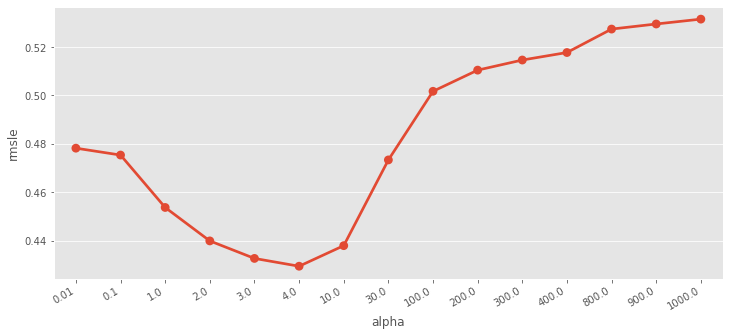

In [12]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

라쏘 Regularization Model - Lasso

선형회귀의 Regularization(규제)를 적용하는 대안
계수를 0에 가깝게 만들려고 하며 이를 L1규제라고 하며, 어떤 계수는 0이 되기도 하는데 이는 완전히 제외하는 피처가 생긴다는 의미다.
피처 선택이 자동으로 이루어진다고도 볼 수 있다.
alpha 값의 기본 값은 1.0이며, 과소 적합을 줄이기 위해서는 이 값을 줄여야 한다.
그리드 서치로 아래 라쏘모델을 실행했을 때 베스트 알파값은 0.0025
max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.

In [13]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train_log = np.log1p(y_train)
grid_lasso_m.fit( X_train , y_train_log )
preds = grid_lasso_m.predict(X_train)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train_log),np.exp(preds),False))

df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)

df[["alpha", "rmsle"]].head()

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.409636003491487


,alpha,rmsle
0,10.000000,0.676101
1,1.000000,0.647476
2,0.500000,0.610444
3,0.333333,0.571093
4,0.250000,0.552289


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

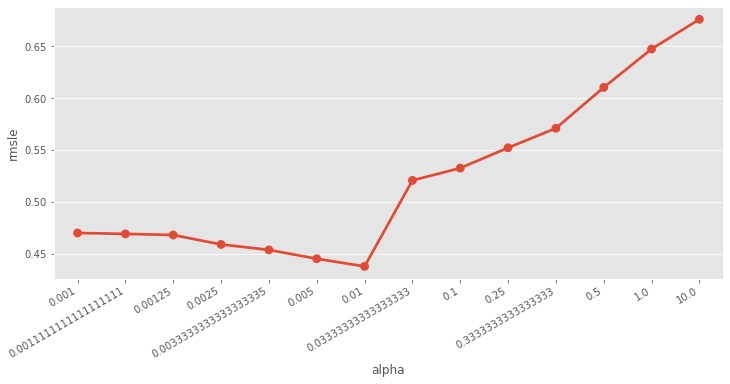

In [14]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

앙상블모델 - 랜덤포레스트

Ensemble Models - Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=3000)

y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds),False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.07148992577326994


앙상블모델 - 그라디언트 부스트

Ensemble Model - Gradient Boost

여러개의 결정트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법
회귀와 분류에 모두 사용할 수 있음
랜덤포레스트와 달리 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
무작위성이 없고 강력한 사전 가지치기가 사용 됨
1~5개의 깊지 않은 트리를 사용하기 때문에 메모리를 적게 사용하고 예측이 빠름
learning_rate : 오차를 얼마나 강하게 보정할 것인지를 제어
n_estimator의 값을 키우면 앙상블에 트리가 더 많이 추가 되어 모델의 복잡도가 커지고 훈련세트에서의 실수를 바로잡을 기회가 많아지지만 너무 크면 모델이 복잡해지고 오버피팅(과대적합)이 될 수있다.
max_depth(max_leaf_nodes) 복잡도를 너무 높이지 말고 트리의 깊이가 5보다 깊어지지 않게 한다.

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=5000, alpha=0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds),False)
print ("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  5.5299912332754334e-05


In [17]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Gradient Boosting Regressor 모델 생성
gbm = GradientBoostingRegressor(n_estimators=3000, alpha=0.01)

# 타겟 변수에 로그 변환 적용
y_train_log = np.log1p(y_train)

# 모델 학습
gbm.fit(X_train, y_train_log)

# 모델 예측
preds = gbm.predict(X_train)

# RMSLE 값 계산
from sklearn.metrics import mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

score = rmsle(np.exp(y_train_log), np.exp(preds))
print("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  4121206.117066729


<AxesSubplot:title={'center':'test(예측값)'}, ylabel='Density'>

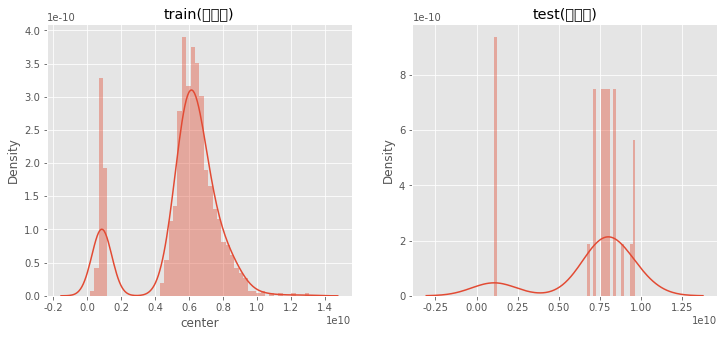

In [18]:
predsTest = rfModel.predict(X_test)   # 모델을 어떤걸 쓸지 선택 gbm(그라이디언트), rfModel
fig,(ax1,ax2)= plt.subplots(ncols=2)
ax1.set(title= "train(실제값)")
ax2.set(title= "test(예측값)")
sns.plot_color = ['R', 'B',]
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)

sumit

In [19]:
submission = pd.read_csv("예측일.csv")
submission

submission["center"] = np.exp(predsTest)

print(submission.shape)
submission.head()

(31, 2)


,datetime,center
0,2023-10-01,1.083599e+09
1,2023-10-02,7.219938e+09
2,2023-10-03,8.883144e+09
3,2023-10-04,8.323311e+09
4,2023-10-05,8.034111e+09


In [20]:
submission.to_csv("예측(최종).csv", index=False)

여기서부턴 시각화

KeyError: '오픈점'

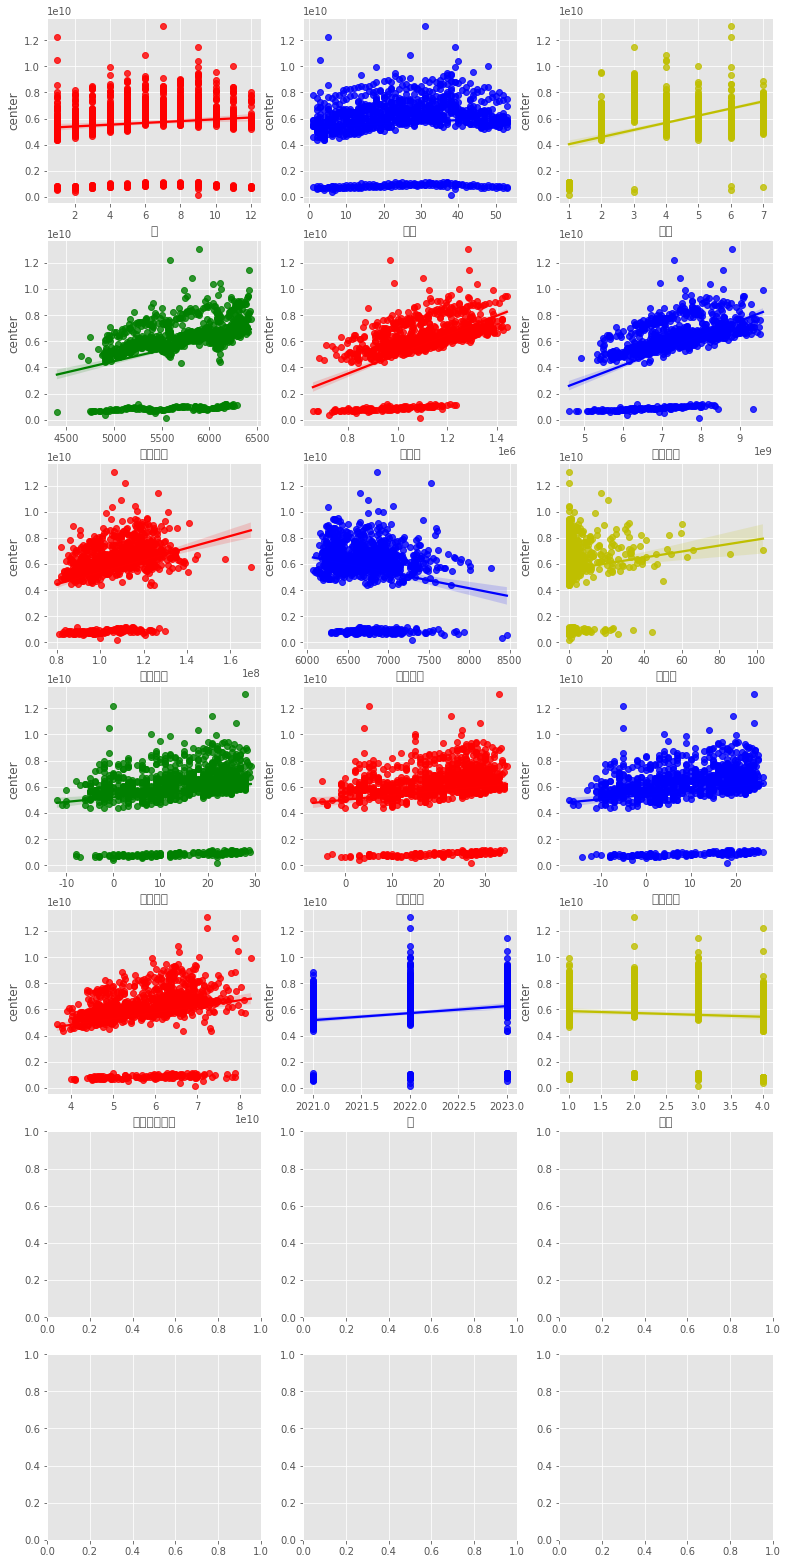

In [21]:
fig, axs = plt.subplots(figsize=(13, 28), ncols=3, nrows=7)  #산점도 그려서 우상향 보자 

x_features = ['월',
 '주차',
 '요일',
 '영업일수',
 '고객수',
 '매출금액',
 '폐기금액',
 '고객단가',
 '강수량',
 '평균기온',
 '최고기온',
 '최저기온',
 '센터재고금액',
 '년',
 '계절',
 '오픈점',
 '폐점']
plot_color = ['r', 'b', 'y', 'g', 'r', 'b','r', 'b', 'y', 'g', 'r', 'b','r', 'b', 'y', 'g','r', 'b', 'y', 'g']
for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='center', data=train, ax=axs[row][col], color=plot_color[i])

plt.show()

In [ ]:
corrMatt = train[['center','월',
 '주차',
 '요일',
 '영업일수',
 '고객수',
 '매출금액',
 '폐기금액',
 '고객단가',
 '강수량',
 '평균기온',
 '최고기온',
 '최저기온',
 '센터재고금액',
 '년',
 '계절',
 '오픈점',
 '폐점']]
corrMatt = corrMatt.corr()
print(corrMatt)  # 출고금액과 상관관계를 보자

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

In [ ]:
fig, ax = plt.subplots()  # 히트맵 그려서 좋은 피처들 구분하자
fig.set_size_inches(30,30)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [ ]:
train.hist(bins=100, figsize=(18,18)) #정규분포도를 함 보자
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False #이걸로 해야 한글이 안깨임
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import pydotplus

In [ ]:
data = pd.read_csv('train9040.csv')
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [ ]:
X.drop(['datetime'], axis=1, inplace=True)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
graph.write_pdf("tree.pdf")